In [1]:
import statsmodels as sm
#https://www.statsmodels.org/dev/vector_ar.html
import pandas as pd

In [2]:

#https://stackoverflow.com/questions/20681297/vector-autoregressive-model-fitting-with-scikit-learn
#https://www.analyticsvidhya.com/blog/2021/08/vector-autoregressive-model-in-python/
#https://blog.devgenius.io/implementing-vector-autoregression-from-scratch-with-python-b12eedbf35ad
#https://notes.quantecon.org/submission/5cc8e7dd4174bb001a39a8ff

#Bayesian VAR
#https://github.com/joergrieger/pybvar

In [3]:
#RMSE loss function

In [13]:
df = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Data/Time Series/train.csv')
df = df.set_index('date')
df = df.iloc[:365,:]
df

,twitter_sentiment_score,twitter_attention_score,BEIR,int_rate,unemp,michigan_sentiment,reddit_sentiment_score,reddit_attention_score,overall_sentiment_score,overall_attention_score,exchange_rate,commodity_index,m2,gdp
date,,,,,,,,,,,,,,
01/06/2021,5.0591,0.553080,2.460000,0.06,6.1,82.9,43.7031,0.061684,48.7622,0.614764,1.224100,99.875276,17915.4,22740.959
02/06/2021,-1.3814,0.679585,2.440000,0.06,6.1,82.9,15.6489,0.052382,14.2675,0.731967,1.221300,99.875276,17915.4,22740.959
03/06/2021,3.9499,0.549937,2.420000,0.06,6.1,82.9,33.4522,0.050233,37.4021,0.600170,1.212200,99.875276,17915.4,22740.959
04/06/2021,6.9923,0.606095,2.400000,0.06,6.1,82.9,31.6540,0.077164,38.6463,0.683259,1.217300,99.875276,17915.4,22740.959
05/06/2021,9.6939,0.533064,2.521818,0.06,6.1,82.9,26.3617,0.048020,36.0556,0.581084,1.216933,99.875276,17915.4,22740.959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27/05/2022,-13.3935,2.373323,2.630000,0.83,3.4,58.4,21.8338,0.074372,8.4403,2.447695,1.070900,155.100579,20235.1,24851.809
28/05/2022,-1.6110,2.046909,2.521818,0.83,3.4,58.4,20.1129,0.067781,18.5019,2.114690,1.069733,155.100579,20235.1,24851.809
29/05/2022,-11.6645,1.686041,2.521818,0.83,3.4,58.4,35.7111,0.056011,24.0466,1.742053,1.071044,155.100579,20235.1,24851.809


In [14]:
df = df[['BEIR','int_rate','unemp','michigan_sentiment','exchange_rate','commodity_index','m2','gdp','overall_sentiment_score','overall_attention_score']]
df

,BEIR,int_rate,unemp,michigan_sentiment,exchange_rate,commodity_index,m2,gdp,overall_sentiment_score,overall_attention_score
date,,,,,,,,,,
01/06/2021,2.460000,0.06,6.1,82.9,1.224100,99.875276,17915.4,22740.959,48.7622,0.614764
02/06/2021,2.440000,0.06,6.1,82.9,1.221300,99.875276,17915.4,22740.959,14.2675,0.731967
03/06/2021,2.420000,0.06,6.1,82.9,1.212200,99.875276,17915.4,22740.959,37.4021,0.600170
04/06/2021,2.400000,0.06,6.1,82.9,1.217300,99.875276,17915.4,22740.959,38.6463,0.683259
05/06/2021,2.521818,0.06,6.1,82.9,1.216933,99.875276,17915.4,22740.959,36.0556,0.581084
...,...,...,...,...,...,...,...,...,...,...
27/05/2022,2.630000,0.83,3.4,58.4,1.070900,155.100579,20235.1,24851.809,8.4403,2.447695
28/05/2022,2.521818,0.83,3.4,58.4,1.069733,155.100579,20235.1,24851.809,18.5019,2.114690
29/05/2022,2.521818,0.83,3.4,58.4,1.071044,155.100579,20235.1,24851.809,24.0466,1.742053


In [6]:
#https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [142]:
filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/Raotbl6.csv'
df = pd.read_csv(filepath, parse_dates=['date'], index_col='date')
print(df.shape)  # (123, 8)
df.tail()

(123, 8)


,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1988-07-01,4042.7,3971.9,179.6,131.5,124.9,106.2,123.5,92.8
1988-10-01,4069.4,3995.8,181.3,133.3,126.2,107.3,124.9,92.9
1989-01-01,4106.8,4019.9,184.1,134.8,127.7,109.5,126.6,94.0
1989-04-01,4132.5,4044.1,186.1,134.8,129.3,111.1,129.0,100.6
1989-07-01,4162.9,4068.4,187.4,137.2,130.2,109.8,129.9,98.2


In [19]:
#Visualising time series

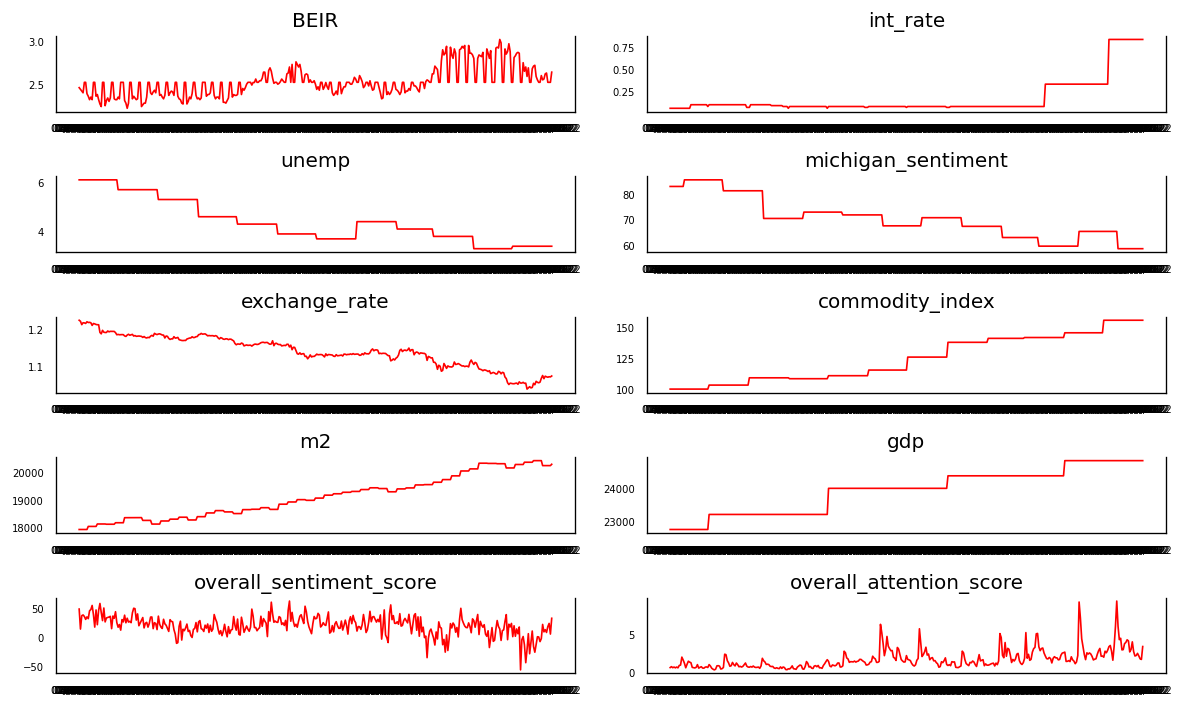

In [146]:
# Plot
fig, axes = plt.subplots(nrows=5, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(train_df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [147]:
#Granger causality test

In [60]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)  

,BEIR_x,int_rate_x,unemp_x,michigan_sentiment_x,exchange_rate_x,commodity_index_x,m2_x,gdp_x,overall_sentiment_score_x,overall_attention_score_x
BEIR_y,1.0000,0.0011,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0372,0.0007
int_rate_y,0.0000,1.0000,0.2503,0.3476,0.0092,0.0000,0.0000,0.1504,0.2422,0.3099
unemp_y,0.4906,0.8083,1.0000,0.0157,0.4527,0.6212,0.2046,0.4548,0.3611,0.7507
michigan_sentiment_y,0.1905,0.0000,0.2128,1.0000,0.0489,0.0000,0.0171,0.0425,0.1956,0.0000
exchange_rate_y,0.0613,0.0941,0.0517,0.3778,1.0000,0.0361,0.0002,0.0254,0.3983,0.0050
commodity_index_y,0.1823,0.6268,0.1510,0.8626,0.0151,1.0000,0.0083,0.2028,0.1001,0.7023
m2_y,0.0143,0.0063,0.0153,0.1433,0.3534,0.0206,1.0000,0.0000,0.0240,0.2544
gdp_y,0.5569,0.5809,0.1251,0.2983,0.0568,0.3288,0.0266,1.0000,0.7011,0.6380
overall_sentiment_score_y,0.0026,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.0001,1.0000,0.0000
overall_attention_score_y,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0030,1.0000


In [61]:
#Cointegration test

In [62]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)


cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
BEIR   ::  239.79    > 219.4051  =>   True
int_rate ::  176.06    > 179.5199  =>   False
unemp  ::  122.84    > 143.6691  =>   False
michigan_sentiment ::  91.11     > 111.7797  =>   False
exchange_rate ::  64.65     > 83.9383   =>   False
commodity_index ::  41.99     > 60.0627   =>   False
m2     ::  23.86     > 40.1749   =>   False
gdp    ::  11.0      > 24.2761   =>   False
overall_sentiment_score ::  3.47      > 12.3212   =>   False
overall_attention_score ::  0.0       > 4.1296    =>   False


In [63]:
#Train test split

In [64]:
nobs = 31
df_train1, df_test1 = df[0:-nobs], df[-nobs:]

In [65]:
df_train1
df_test1

,BEIR,int_rate,unemp,michigan_sentiment,exchange_rate,commodity_index,m2,gdp,overall_sentiment_score,overall_attention_score
date,,,,,,,,,,
01/05/2022,2.521818,0.33,3.4,65.2,1.052189,155.100579,20150.2,24851.809,1.2145,1.954149
02/05/2022,2.810000,0.33,3.4,65.2,1.052100,155.100579,20150.2,24851.809,19.9657,2.725710
03/05/2022,2.830000,0.33,3.4,65.2,1.053200,155.100579,20275.5,24851.809,1.8811,2.523079
04/05/2022,2.860000,0.33,3.4,65.2,1.053900,155.100579,20275.5,24851.809,14.5385,2.849376
05/05/2022,2.870000,0.83,3.4,65.2,1.050700,155.100579,20275.5,24851.809,6.2339,3.316038
06/05/2022,2.860000,0.83,3.4,65.2,1.057200,155.100579,20275.5,24851.809,17.8534,3.464465
07/05/2022,2.521818,0.83,3.4,65.2,1.053933,155.100579,20275.5,24851.809,-56.0960,2.735565
08/05/2022,2.521818,0.83,3.4,65.2,1.053944,155.100579,20275.5,24851.809,-4.0143,1.563207
09/05/2022,2.750000,0.83,3.4,65.2,1.055900,155.100579,20275.5,24851.809,1.4806,3.380288


In [66]:
#Stationarity test

In [67]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [68]:
for name, column in train_df.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')
    #print(name, column)

    Augmented Dickey-Fuller Test on "BEIR" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.6777
 No. Lags Chosen       = 14
 Critical value 1%     = -3.449
 Critical value 5%     = -2.87
 Critical value 10%    = -2.571
 => P-Value = 0.4427. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "int_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.4622
 No. Lags Chosen       = 0
 Critical value 1%     = -3.448
 Critical value 5%     = -2.87
 Critical value 10%    = -2.571
 => P-Value = 0.9837. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "unemp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit

In [69]:
train_df_differenced = train_df.diff().dropna()

In [70]:
for name, column in train_df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "BEIR" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.4161
 No. Lags Chosen       = 13
 Critical value 1%     = -3.449
 Critical value 5%     = -2.87
 Critical value 10%    = -2.571
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "int_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -19.1764
 No. Lags Chosen       = 0
 Critical value 1%     = -3.448
 Critical value 5%     = -2.87
 Critical value 10%    = -2.571
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "unemp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 

In [71]:
df_train1

,BEIR,int_rate,unemp,michigan_sentiment,exchange_rate,commodity_index,m2,gdp,overall_sentiment_score,overall_attention_score
date,,,,,,,,,,
01/06/2021,2.460000,0.06,6.1,82.9,1.224100,99.875276,17915.4,22740.959,48.7622,0.614764
02/06/2021,2.440000,0.06,6.1,82.9,1.221300,99.875276,17915.4,22740.959,14.2675,0.731967
03/06/2021,2.420000,0.06,6.1,82.9,1.212200,99.875276,17915.4,22740.959,37.4021,0.600170
04/06/2021,2.400000,0.06,6.1,82.9,1.217300,99.875276,17915.4,22740.959,38.6463,0.683259
05/06/2021,2.521818,0.06,6.1,82.9,1.216933,99.875276,17915.4,22740.959,36.0556,0.581084
...,...,...,...,...,...,...,...,...,...,...
26/04/2022,2.850000,0.33,3.3,65.2,1.066100,145.041207,20150.2,24851.809,39.1744,2.318911
27/04/2022,2.880000,0.33,3.3,65.2,1.054900,145.041207,20150.2,24851.809,-4.0314,2.787684
28/04/2022,2.970000,0.33,3.3,65.2,1.050000,145.041207,20150.2,24851.809,22.6656,3.085271


In [72]:
train_df_differenced

,BEIR,int_rate,unemp,michigan_sentiment,exchange_rate,commodity_index,m2,gdp,overall_sentiment_score,overall_attention_score
date,,,,,,,,,,
02/06/2021,-0.020000,0.0,0.0,0.0,-0.002800,0.0,0.0,0.0,-34.4947,0.117203
03/06/2021,-0.020000,0.0,0.0,0.0,-0.009100,0.0,0.0,0.0,23.1346,-0.131797
04/06/2021,-0.020000,0.0,0.0,0.0,0.005100,0.0,0.0,0.0,1.2442,0.083090
05/06/2021,0.121818,0.0,0.0,0.0,-0.000367,0.0,0.0,0.0,-2.5907,-0.102175
06/06/2021,0.000000,0.0,0.0,0.0,-0.001456,0.0,0.0,0.0,-5.1004,0.101130
...,...,...,...,...,...,...,...,...,...,...
27/05/2022,0.010000,0.0,0.0,0.0,-0.001600,0.0,0.0,0.0,-4.8136,0.275502
28/05/2022,-0.108182,0.0,0.0,0.0,-0.001167,0.0,0.0,0.0,10.0616,-0.333004
29/05/2022,0.000000,0.0,0.0,0.0,0.001311,0.0,0.0,0.0,5.5447,-0.372638


In [31]:
def plot_vars(data, levels, color, leveltype, name):
    
    """
    Displays historical trends of VAR variables
    And see if it's sensible to just select levels instead of differences
    """
    
    fig, ax = plt.subplots(1, 2, figsize=(12,2.5), sharex=True)
    
    palettes = ["blue", "green", "red", "orange", "purple", "black"]
    
    for col, i in dict(zip(levels, list(range(3)))).items():
        data[col].plot(ax=ax[i], legend=True, linewidth=1.0, color=color, sharex=True)     
    
    #fig.xlabel
    fig.set_facecolor("floralwhite")
    #fig.savefig(name)
    fig.suptitle(f"Historical trends of VAR {leveltype} variables", 
                 fontsize=14, fontweight="bold", fontname="Verdana")

In [32]:
train_df_differenced.columns

Index(['BEIR', 'int_rate', 'unemp', 'michigan_sentiment', 'exchange_rate',
       'commodity_index', 'm2', 'gdp', 'overall_sentiment_score',
       'overall_attention_score'],
      dtype='object')

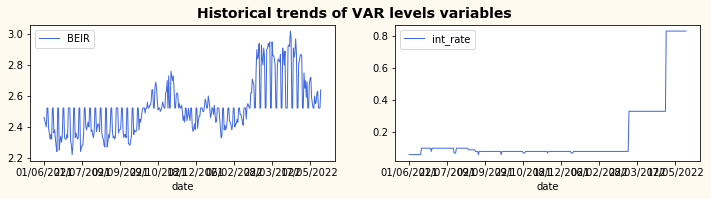

In [33]:
plot_vars(train_df, levels = ['BEIR', 'int_rate'], color="royalblue", leveltype="levels", name='levels1')

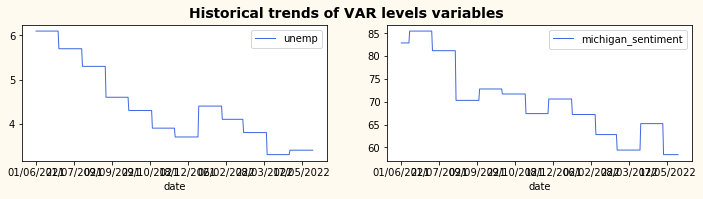

In [34]:
plot_vars(train_df, levels = ['unemp', 'michigan_sentiment'], color="royalblue", leveltype="levels", name='levels2')

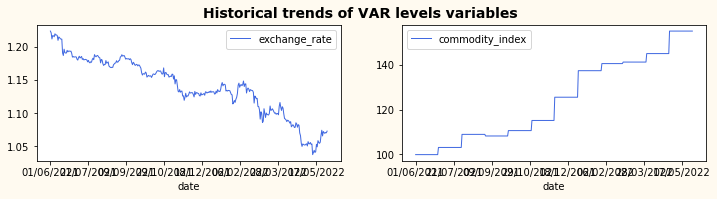

In [35]:
plot_vars(train_df, levels = ['exchange_rate', 'commodity_index'], color="royalblue", leveltype="levels", name='levels3')

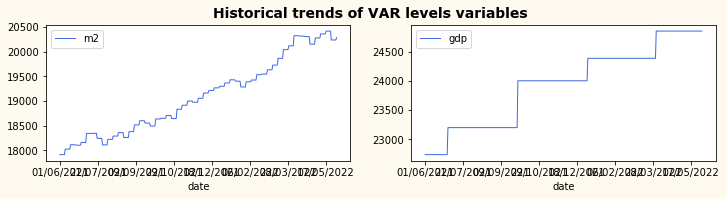

In [36]:
plot_vars(train_df, levels = ['m2', 'gdp'], color="royalblue", leveltype="levels", name='levels4')

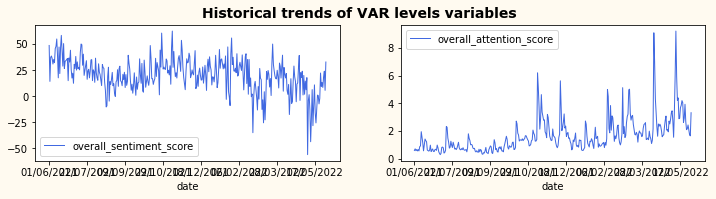

In [37]:
plot_vars(train_df, levels = ['overall_sentiment_score', 'overall_attention_score'], color="royalblue", leveltype="levels", name='levels5')

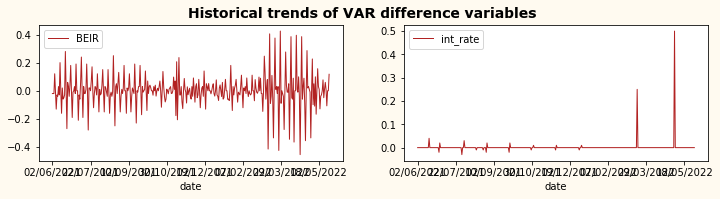

In [38]:
plot_vars(train_df_differenced, levels = ['BEIR', 'int_rate'], color="firebrick", leveltype="difference", name='difference1')

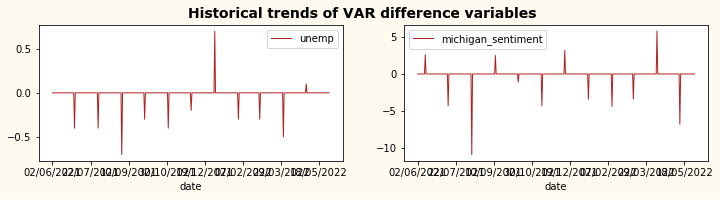

In [39]:
plot_vars(train_df_differenced, levels = ['unemp', 'michigan_sentiment'], color="firebrick", leveltype="difference", name='difference2')

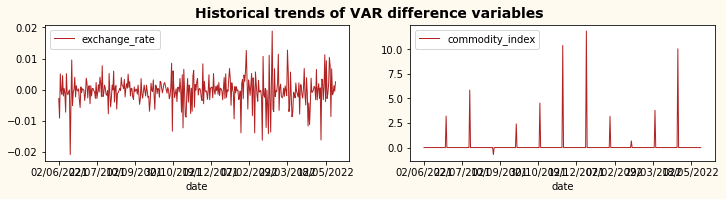

In [40]:
plot_vars(train_df_differenced, levels = ['exchange_rate', 'commodity_index'], color="firebrick", leveltype="difference", name='difference3')

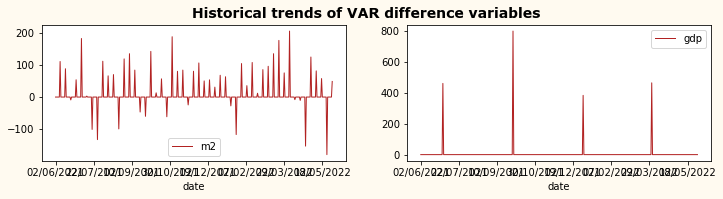

In [41]:
plot_vars(train_df_differenced, levels = ['m2', 'gdp'], color="firebrick", leveltype="difference", name='difference4')

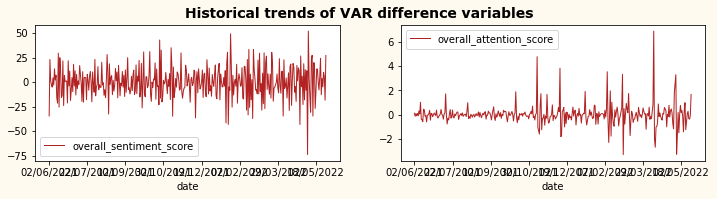

In [42]:
plot_vars(train_df_differenced, levels = ['overall_sentiment_score', 'overall_attention_score'], color="firebrick", leveltype="difference", name='difference5')

In [194]:
#Selecting appropriate lag

In [73]:
model = VAR(train_df_differenced)
for i in [1,2,3,4,5,6,7,8,9,10]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')
    
#Almost all criteria hit minimum at 2 lags

Lag Order = 1
AIC :  -6.96643816732467
BIC :  -5.786316096335321
FPE :  0.00094318080939547
HQIC:  -6.4973453015798555 

Lag Order = 2
AIC :  -7.151531406287328
BIC :  -4.893947747493371
FPE :  0.0007846857162670344
HQIC:  -6.254059729591422 

Lag Order = 3
AIC :  -6.935282761247413
BIC :  -3.5958030740363514
FPE :  0.0009769819006835514
HQIC:  -5.6075802746799415 

Lag Order = 4
AIC :  -6.911369750513445
BIC :  -2.4855290480285452
FPE :  0.0010063309522021125
HQIC:  -5.151571567969925 

Lag Order = 5
AIC :  -7.018852844638362
BIC :  -1.50215530110348
FPE :  0.0009123337287935961
HQIC:  -4.825081070031744 

Lag Order = 6
AIC :  -7.001990858209172
BIC :  -0.38990951266607965
FPE :  0.0009411347065581818
HQIC:  -4.3723544611897625 

Lag Order = 7
AIC :  -6.913698954502886
BIC :  0.7983245890924753
FPE :  0.0010489389565533857
HQIC:  -3.846293644675173 

Lag Order = 8
AIC :  -6.572218468485372
BIC :  2.2443374078914378
FPE :  0.0015167895864688953
HQIC:  -3.065126568099817 

Lag Order = 9

In [74]:
model_fitted = model.fit(2)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 02, Aug, 2022
Time:                     11:09:06
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                   -4.89395
Nobs:                     362.000    HQIC:                  -6.25406
Log likelihood:          -3632.13    FPE:                0.000784686
AIC:                     -7.15153    Det(Omega_mle):     0.000446471
--------------------------------------------------------------------
Results for equation BEIR
                                coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------
const                              0.003653         0.005786            0.631           0.528
L1.BEIR                           -0.074806         0.048179           -1.553           0.121
L1.int_ra

In [75]:
#Checking for serial correlation#
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(train_df_differenced.columns, out):
    print(str(col), ':', round(val, 2))

BEIR : 2.06
int_rate : 2.01
unemp : 2.01
michigan_sentiment : 2.03
exchange_rate : 1.89
commodity_index : 2.0
m2 : 1.99
gdp : 1.99
overall_sentiment_score : 2.11
overall_attention_score : 2.06


In [76]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = train_df_differenced.values[-lag_order:]
forecast_input

2


array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -4.85185000e-04,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -1.84002000e+01,
        -7.81102620e-02],
       [ 1.18181818e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.54074100e-03,  0.00000000e+00,
         4.88000000e+01,  0.00000000e+00,  2.72226000e+01,
         1.66394103e+00]])

In [77]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=train_df.index[-nobs:], columns=train_df.columns + '_1d')
df_forecast

,BEIR_1d,int_rate_1d,unemp_1d,michigan_sentiment_1d,exchange_rate_1d,commodity_index_1d,m2_1d,gdp_1d,overall_sentiment_score_1d,overall_attention_score_1d
date,,,,,,,,,,
01/05/2022,0.001967,0.001736,-0.017954,-0.132290,-0.000726,0.125597,10.015602,-1.062746,-10.988297,0.430773
02/05/2022,-0.035671,0.007903,-0.006433,-0.517464,-0.001966,0.046233,7.817469,3.567105,-4.954360,-0.384228
03/05/2022,0.003876,0.003229,-0.006234,-0.101496,-0.000016,0.178938,-0.049237,11.162482,5.820948,-0.147355
04/05/2022,0.006182,0.002916,-0.005675,-0.005008,-0.000179,0.141251,5.925012,6.287976,-2.194996,0.079268
05/05/2022,-0.000896,0.000413,-0.007824,-0.045564,-0.000408,0.145003,8.040187,3.842605,-0.572232,0.034627
06/05/2022,-0.000972,0.002179,-0.007900,-0.075311,-0.000451,0.161971,5.603823,6.377160,0.680418,0.001569
07/05/2022,0.001794,0.002502,-0.007322,-0.075038,-0.000416,0.153439,6.619846,5.996779,-0.040329,0.001189
08/05/2022,0.001128,0.001900,-0.007476,-0.067021,-0.000378,0.149055,6.841097,5.597684,-0.226127,0.007889
09/05/2022,-0.000250,0.002159,-0.007524,-0.067958,-0.000380,0.152117,6.473869,5.806894,0.017838,0.009903


In [78]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [79]:
df_results = invert_transformation(df_train1, df_forecast, second_diff=False)

In [80]:
df_results
#.iloc[:,6:]

,BEIR_1d,int_rate_1d,unemp_1d,michigan_sentiment_1d,exchange_rate_1d,commodity_index_1d,m2_1d,gdp_1d,overall_sentiment_score_1d,overall_attention_score_1d,BEIR_forecast,int_rate_forecast,unemp_forecast,michigan_sentiment_forecast,exchange_rate_forecast,commodity_index_forecast,m2_forecast,gdp_forecast,overall_sentiment_score_forecast,overall_attention_score_forecast
date,,,,,,,,,,,,,,,,,,,,
01/05/2022,0.001967,0.001736,-0.017954,-0.132290,-0.000726,0.125597,10.015602,-1.062746,-10.988297,0.430773,2.523786,0.331736,3.282046,65.067710,1.052140,145.166804,20160.215602,24850.746254,13.032203,2.539006
02/05/2022,-0.035671,0.007903,-0.006433,-0.517464,-0.001966,0.046233,7.817469,3.567105,-4.954360,-0.384228,2.488114,0.339639,3.275614,64.550246,1.050175,145.213037,20168.033071,24854.313360,8.077842,2.154778
03/05/2022,0.003876,0.003229,-0.006234,-0.101496,-0.000016,0.178938,-0.049237,11.162482,5.820948,-0.147355,2.491991,0.342868,3.269379,64.448750,1.050159,145.391975,20167.983834,24865.475842,13.898790,2.007423
04/05/2022,0.006182,0.002916,-0.005675,-0.005008,-0.000179,0.141251,5.925012,6.287976,-2.194996,0.079268,2.498173,0.345784,3.263704,64.443742,1.049980,145.533226,20173.908846,24871.763818,11.703795,2.086691
05/05/2022,-0.000896,0.000413,-0.007824,-0.045564,-0.000408,0.145003,8.040187,3.842605,-0.572232,0.034627,2.497276,0.346197,3.255880,64.398179,1.049572,145.678229,20181.949033,24875.606423,11.131563,2.121318
06/05/2022,-0.000972,0.002179,-0.007900,-0.075311,-0.000451,0.161971,5.603823,6.377160,0.680418,0.001569,2.496304,0.348375,3.247980,64.322868,1.049121,145.840200,20187.552856,24881.983583,11.811980,2.122887
07/05/2022,0.001794,0.002502,-0.007322,-0.075038,-0.000416,0.153439,6.619846,5.996779,-0.040329,0.001189,2.498098,0.350877,3.240658,64.247830,1.048705,145.993638,20194.172702,24887.980362,11.771651,2.124076
08/05/2022,0.001128,0.001900,-0.007476,-0.067021,-0.000378,0.149055,6.841097,5.597684,-0.226127,0.007889,2.499226,0.352777,3.233182,64.180810,1.048326,146.142694,20201.013799,24893.578046,11.545523,2.131965
09/05/2022,-0.000250,0.002159,-0.007524,-0.067958,-0.000380,0.152117,6.473869,5.806894,0.017838,0.009903,2.498976,0.354936,3.225658,64.112851,1.047947,146.294810,20207.487668,24899.384939,11.563361,2.141868


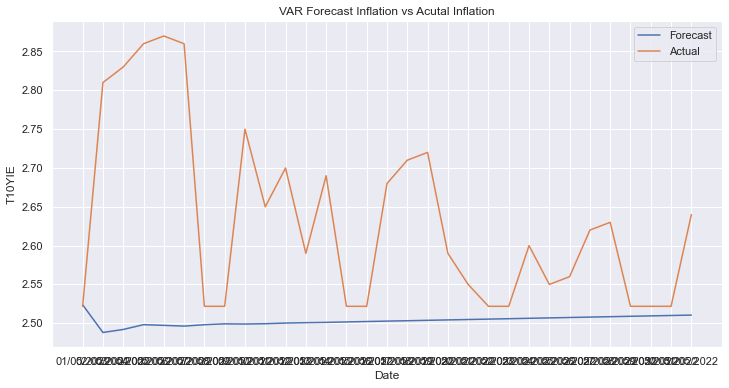

In [81]:
#Sentiment same plot
plt.figure(figsize=(12,6))
plt.plot(df_results.index, df_results['BEIR_forecast'], label = "Forecast")
# plotting the line 2 points 
plt.plot(df_results.index, df_test1['BEIR'], label = "Actual")
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('T10YIE')
# Set a title of the current axes.
plt.title('VAR Forecast Inflation vs Acutal Inflation')
plt.savefig('var_trad_forecast.png')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [82]:
from sklearn import (linear_model, metrics, neural_network, pipeline, preprocessing, model_selection)

In [83]:
#Forecast MSE
metrics.mean_squared_error(df_results['BEIR_forecast'], df_test1['BEIR'], squared = False)

0.1777878188794476

### LASSO Approach

In [84]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd 
import seaborn as sns
sns.set()
import datetime as dt
import warnings
warnings.simplefilter('ignore')

In [86]:
#df_train1.iloc[:,0]
#df_test1

X_train = df_train1.iloc[:,1:]
y_train = df_train1.iloc[:,0]
X_test = df_test1.iloc[:,1:]
y_test = df_test1.iloc[:,0]

In [90]:
y_test

date
01/05/2022    2.521818
02/05/2022    2.810000
03/05/2022    2.830000
04/05/2022    2.860000
05/05/2022    2.870000
06/05/2022    2.860000
07/05/2022    2.521818
08/05/2022    2.521818
09/05/2022    2.750000
10/05/2022    2.650000
11/05/2022    2.700000
12/05/2022    2.590000
13/05/2022    2.690000
14/05/2022    2.521818
15/05/2022    2.521818
16/05/2022    2.680000
17/05/2022    2.710000
18/05/2022    2.720000
19/05/2022    2.590000
20/05/2022    2.550000
21/05/2022    2.521818
22/05/2022    2.521818
23/05/2022    2.600000
24/05/2022    2.550000
25/05/2022    2.560000
26/05/2022    2.620000
27/05/2022    2.630000
28/05/2022    2.521818
29/05/2022    2.521818
30/05/2022    2.521818
31/05/2022    2.640000
Name: BEIR, dtype: float64

In [93]:
def train_test_plot(model, X_train, X_test):
    """
    This will plot the actual values of CPI against the one fitted by the model
    We train the model until 2009 and then use it from 2009 onwards on the test features dataset
    """
    fig, ax = plt.subplots(figsize=(12,4))
    colors = sns.color_palette("deep", 8)
    
    yvalues = pd.DataFrame(y_test)
    
    forecasted = list(model.predict(X_test)) # Use the model fit on features data from 2009 onwards
    df_fcast = pd.DataFrame({"date": list(yvalues.index), "BEIR_fcast": forecasted})
    df_fcast = df_fcast.set_index("date")
    
    df = pd.merge(yvalues, df_fcast, left_index=True, right_index=True)

    df["BEIR_fcast"].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="forestgreen") # CPI fitted
    df["BEIR"].plot(ax=ax, legend=True, linewidth=1.5, linestyle="solid", color="salmon") # Actual CPI values
    
    ax.set_title("BEIR vs. Model's BEIR")
    ax.set_ylabel("BEIR")
    ax.legend(["Forecasted BEIR","Actual BEIR"])

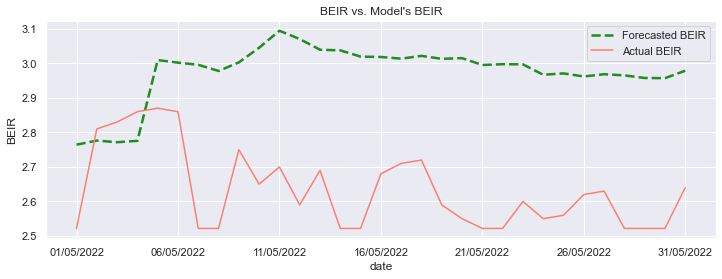

In [94]:
lasso = linear_model.LassoCV(cv=model_selection.TimeSeriesSplit(n_splits=5), 
                             alphas=None, tol = 10000, normalize=True) 

lasso = lasso.fit(X_train, y_train)
optimal_alpha = lasso.alpha_

lasso2 = linear_model.Lasso(alpha=optimal_alpha, normalize=True)
lasso2.fit(X_train, y_train)

train_test_plot(lasso2, X_train, X_test) 

In [95]:
metrics.mean_squared_error(y_test, lasso2.predict(X_test), squared = False)

0.37465797074432394

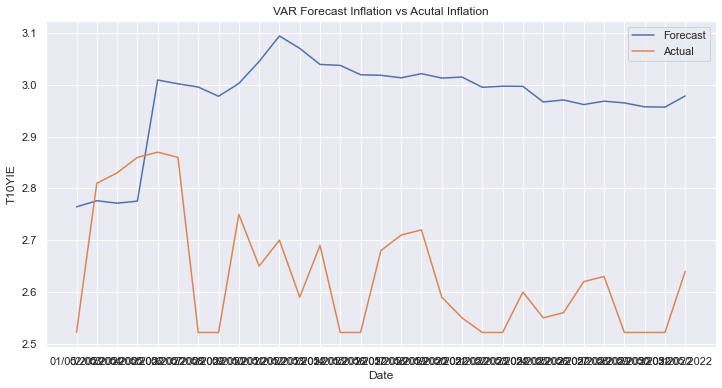

In [96]:
plt.figure(figsize=(12,6))
plt.plot(df_results.index, lasso2.predict(X_test), label = "Forecast")
# plotting the line 2 points 
plt.plot(df_results.index, y_test, label = "Actual")
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('T10YIE')
# Set a title of the current axes.
plt.title('VAR Forecast Inflation vs Acutal Inflation')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [97]:
lasso_coefs = pd.DataFrame({"features":list(X_train), "coef": lasso2.coef_})
lasso_coefs = lasso_coefs[lasso_coefs.coef != 0.0]
lasso_coefs.sort_values("coef", ascending=False)

,features,coef
0,int_rate,0.444294
8,overall_attention_score,0.015218
2,michigan_sentiment,-0.000307
1,unemp,-0.006139
3,exchange_rate,-1.474640


### XGBoost

In [98]:
#!pip install xgboost
from xgboost import XGBRegressor, plot_importance

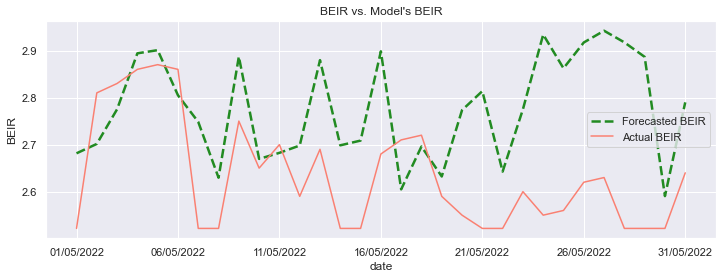

In [99]:
# Build XGBoost
# Normalize the features 
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)

train_test_plot(model=xgb, X_train=X_train_scaled, X_test=X_test_scaled)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

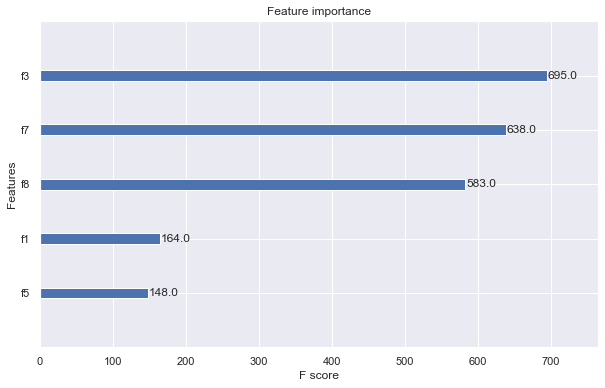

In [100]:
fig_xgb, ax_xgb = plt.subplots(figsize=(10,6))
plot_importance(xgb, max_num_features=5, ax=ax_xgb)

In [101]:
# Feature selection

for i, name in dict(zip(list(range(len(X_train.columns))), list(X_train.columns.values))).items():
    if i == 3:
        print(f"Feature {i} is {name}")
    elif i == 7:
        print(f"Feature {i} is {name}")
    elif i == 8:
        print(f"Feature {i} is {name}")
    elif i == 1:
        print(f"Feature {i} is {name}")
    elif i == 5:
        print(f"Feature {i} is {name}")

Feature 1 is unemp
Feature 3 is exchange_rate
Feature 5 is m2
Feature 7 is overall_sentiment_score
Feature 8 is overall_attention_score


In [102]:
metrics.mean_squared_error(y_test, xgb.predict(X_test), squared = False)

0.1271466669764552

In [ ]:
#Overall, traditional method performs best - then XGBoost then LASSO
#Although LASSO and XGBoost agree that unemp, int_rate, michigan_sentiment,
#and overall_attention_score are most important, they both perform worse than 
#the traditional, vanilla VAR model that also includes overall_sentiment_score